In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
import numpy as np


def org_model(x):
    return np.sin(np.pi * x) / (np.pi * x) + 0.1 * x


def get_samples(x_samples, f):
    return f(x_samples) + 0.2* np.random.randn(len(x_samples))


def kern(x, c, h=0.2):
    norm = x - c
    return np.exp(- norm**2 / (2 * (h**2)))


kerns = np.vectorize(kern)
def kern_matrix(x_samples, h=0.2):
    return np.array([kerns(xi, x_samples, h) for xi in x_samples])


def ADM(samples_x, samples_y, lamb=1, h=0.2):
    dim = len(samples_x)
    u, z = np.zeros(dim), np.zeros(dim)
    K = kern_matrix(samples_x, h)
    
    iteration_cycles = 1500
    for i in range(iteration_cycles):
            theta = next_theta(K, samples_y, u, z, lamb, h)
            z = next_z(theta, u, lamb)
            u = next_u(theta, u, z)
    return theta


def next_theta(K, y, u, z, lamb=1, h=0.2):
    Kt = np.transpose(K)
    Q = np.linalg.inv(np.matmul(Kt, K) + np.eye(len(y)))
    gamma = np.matmul(Kt, y) + z - u
    return np.matmul(Q, gamma)


def next_z(theta, u, lamb=1):
    term1 = np.maximum(0, theta + u - lamb * np.ones(len(u)))
    term2 = np.maximum(0, - theta - u - lamb * np.ones(len(u)))
    return term1 - term2


def next_u(theta, u, z):
    return theta + u - z


def kern_model_gen(x_samples, y_samples, lamb=1, h=0.2):
    est_theta = ADM(x_samples, y_samples, lamb, h)
    def _model(x):
        return np.dot(est_theta, kerns(x, x_samples, h))
    v_model = np.vectorize(_model)
    return v_model


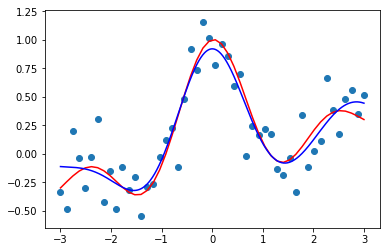

In [6]:
np.random.seed()
x_min, x_max = -3, 3
n = 50
N = 1000
x = np.linspace(x_min, x_max, n)
X = np.linspace(x_min, x_max, N)

y = org_model(x)
# _y = get_samples(x, org_model)

lamb = 0.1
h = 0.7
# h = 0.1
est_model = kern_model_gen(x, _y, lamb, h)
Y = est_model(X)

# Use kernel ridge model in sklearn
# clf = KernelRidge(alpha=1.0, kernel='rbf')
# clf.fit(x.reshape((-1, 1)), _y)
# Y2 = clf.predict(X.reshape((-1, 1)))

plt.scatter(x, _y)
# plt.plot(x, y, 'r-', X, Y, 'b-', X, Y2, 'g:')
plt.plot(x, y, 'r-', X, Y, 'b-')
plt.show()